In [ ]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=5535fd5f9b2c92c316bc236554dac5cf39d74fe290286c83189891feda437887
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sentence_transformers import SentenceTransformer

# Load the dataset
ng20 = fetch_20newsgroups(subset='all')
corpus = ng20.data[:2000]  # Limiting to the first 2000 documents
labels = ng20.target[:2000]  # Assuming you are using the targets as labels for evaluation




In [ ]:
# Initialize the sentence transformer model for embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(corpus, show_progress_bar=True)



.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
# Dimensionality reduction with UMAP
umap_model = umap.UMAP(n_components=20, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

# Clustering with k-means
k = len(set(labels))  # Number of unique labels
kmeans_model = KMeans(n_clusters=k, random_state=42)
clusters = kmeans_model.fit_predict(umap_embeddings)




/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Bonus

## Visualisation des données sur un plan à l'aide UMAP.




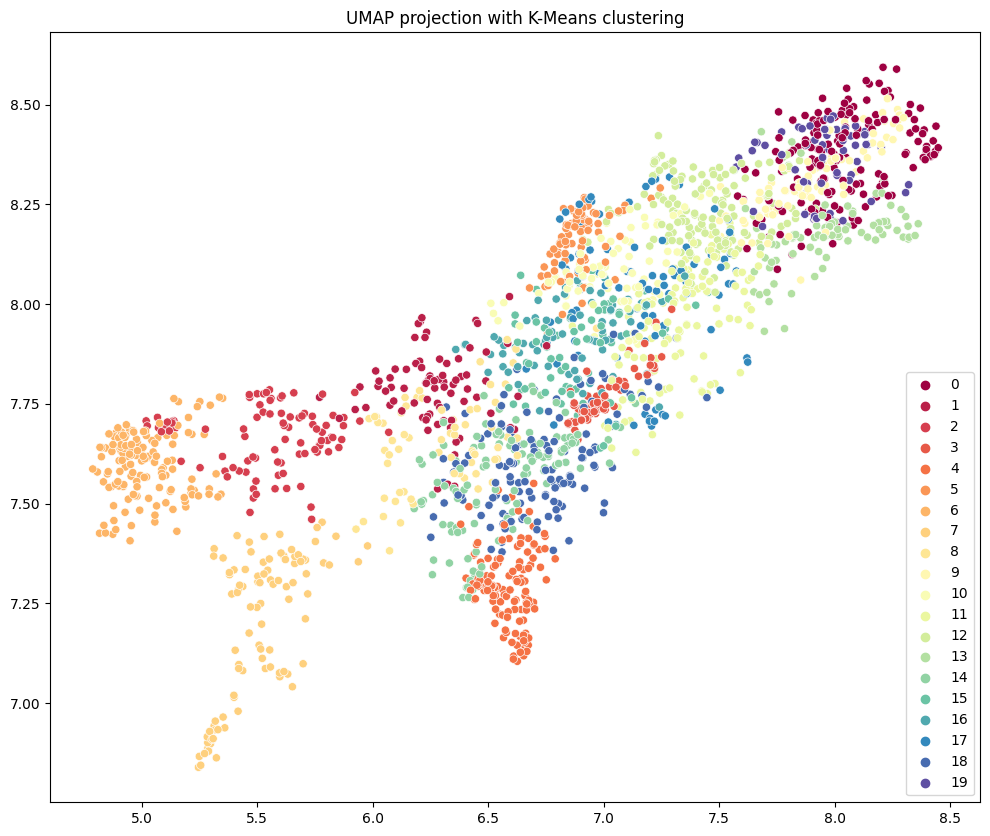

In [ ]:
# Visualization of UMAP embeddings
plt.figure(figsize=(12, 10))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=clusters, palette='Spectral', legend='full')
plt.title('UMAP projection with K-Means clustering')
plt.show()


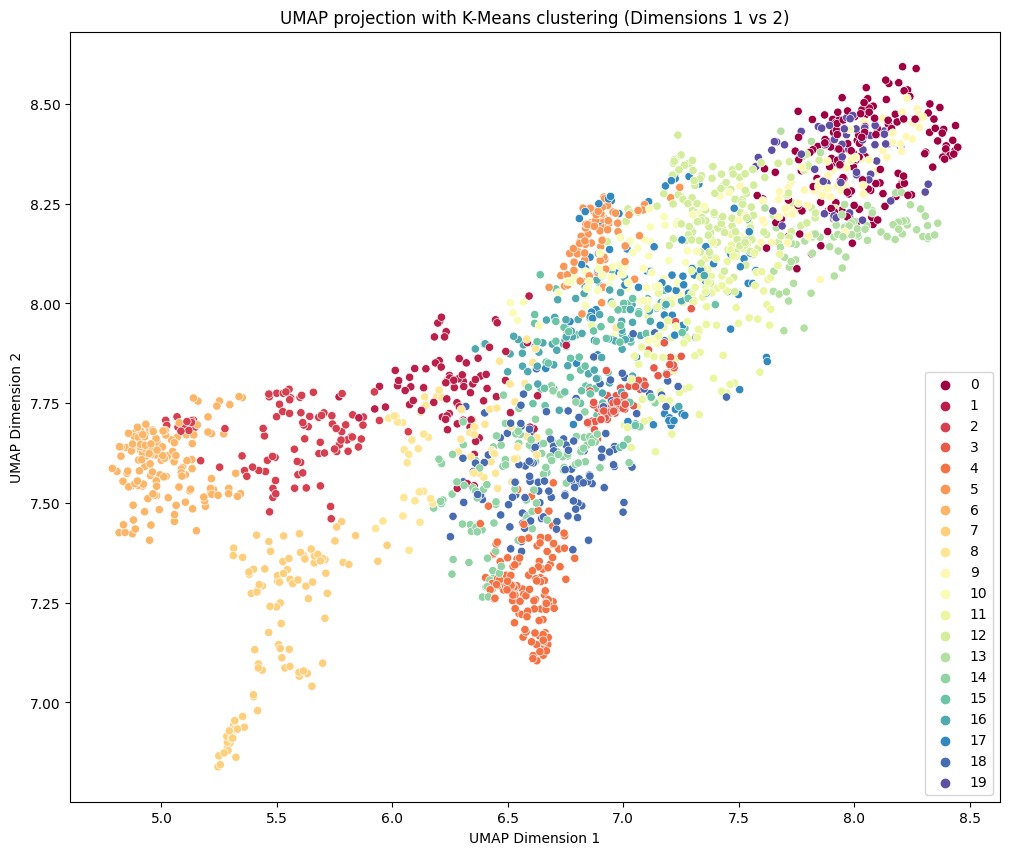

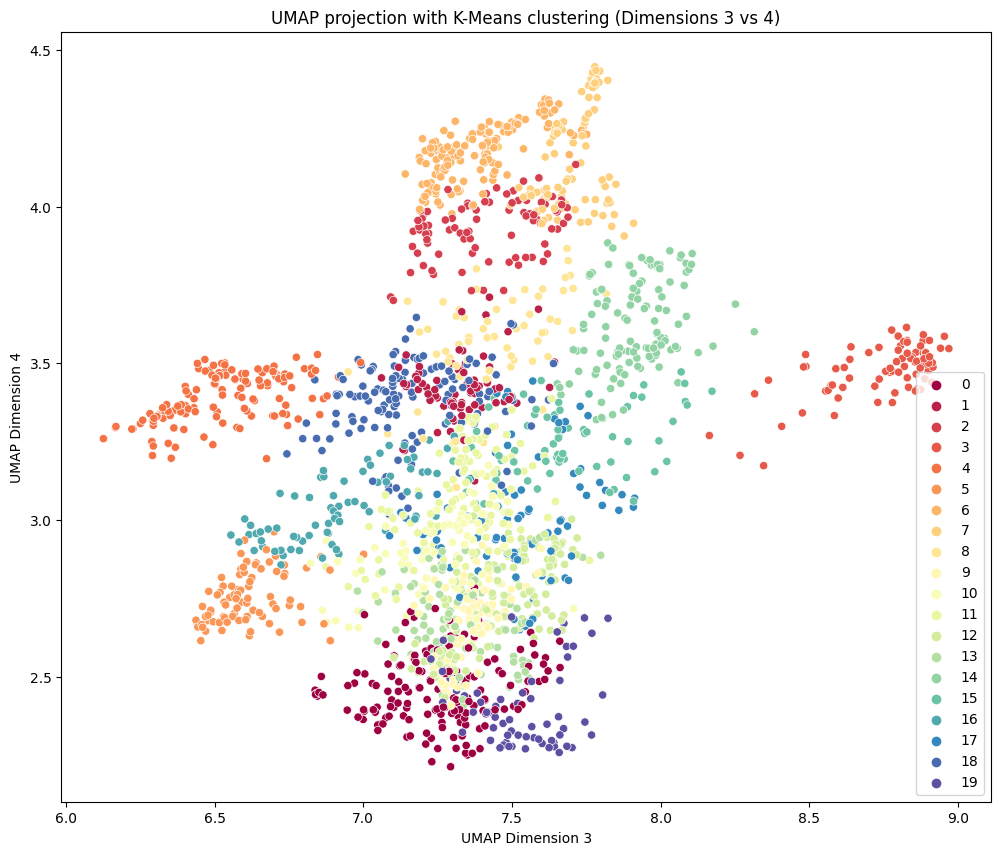

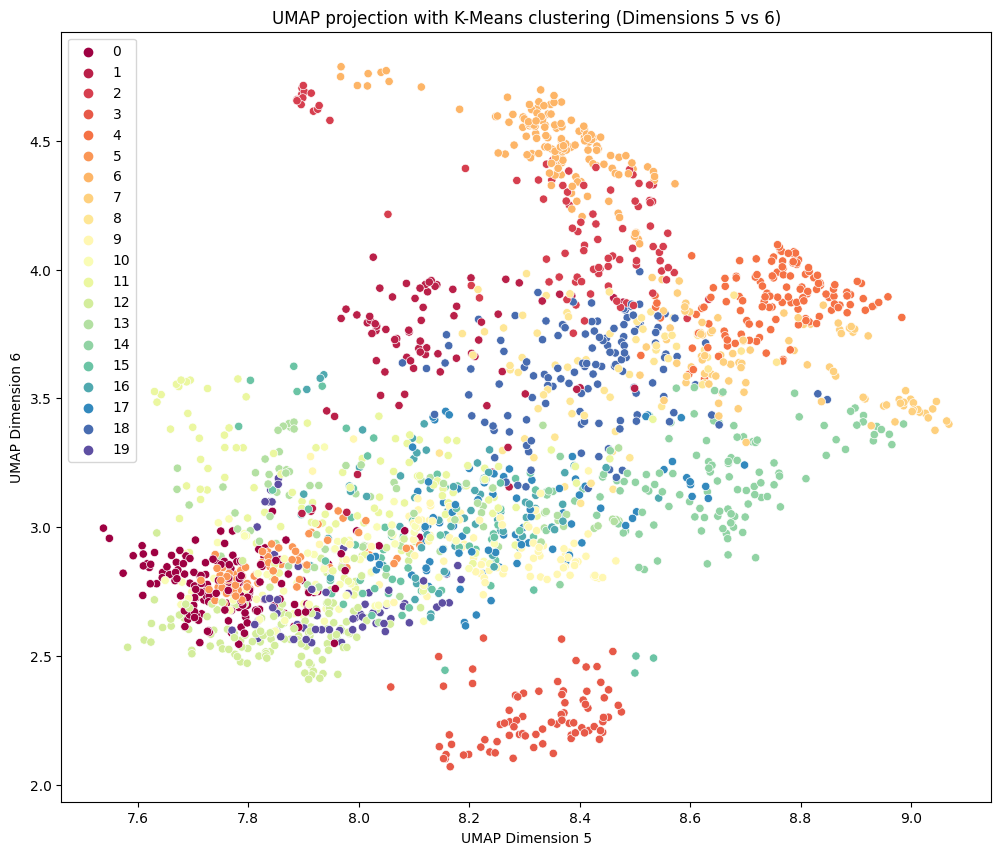

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns


dimension_pairs = [(0, 1), (2, 3), (4, 5)]

for i, (dim_x, dim_y) in enumerate(dimension_pairs):
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x=umap_embeddings[:, dim_x], y=umap_embeddings[:, dim_y], hue=clusters, palette='Spectral', legend='full')
    plt.title(f'UMAP projection with K-Means clustering (Dimensions {dim_x+1} vs {dim_y+1})')
    plt.xlabel(f'UMAP Dimension {dim_x+1}')
    plt.ylabel(f'UMAP Dimension {dim_y+1}')
    plt.show()


In [ ]:
# Evaluation of clustering results (using silhouette score )
silhouette_avg = silhouette_score(umap_embeddings, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')



Silhouette Score: 0.30


In [ ]:
#calculate NMI and ARI like this:
nmi_score = normalized_mutual_info_score(labels, clusters)
ari_score = adjusted_rand_score(labels, clusters)
print(f'NMI Score: {nmi_score:.2f}')
print(f'ARI Score: {ari_score:.2f}')

NMI Score: 0.46
ARI Score: 0.28


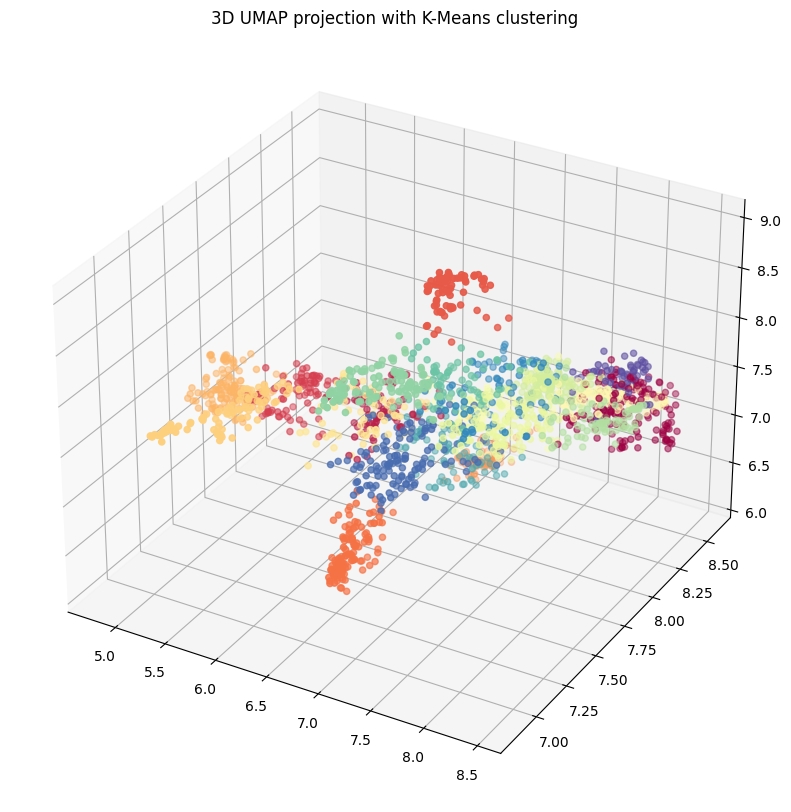

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples

# Ahere's a 3D scatter plot UMAP.

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], umap_embeddings[:, 2], c=clusters, cmap='Spectral')
plt.title('3D UMAP projection with K-Means clustering')
plt.show()



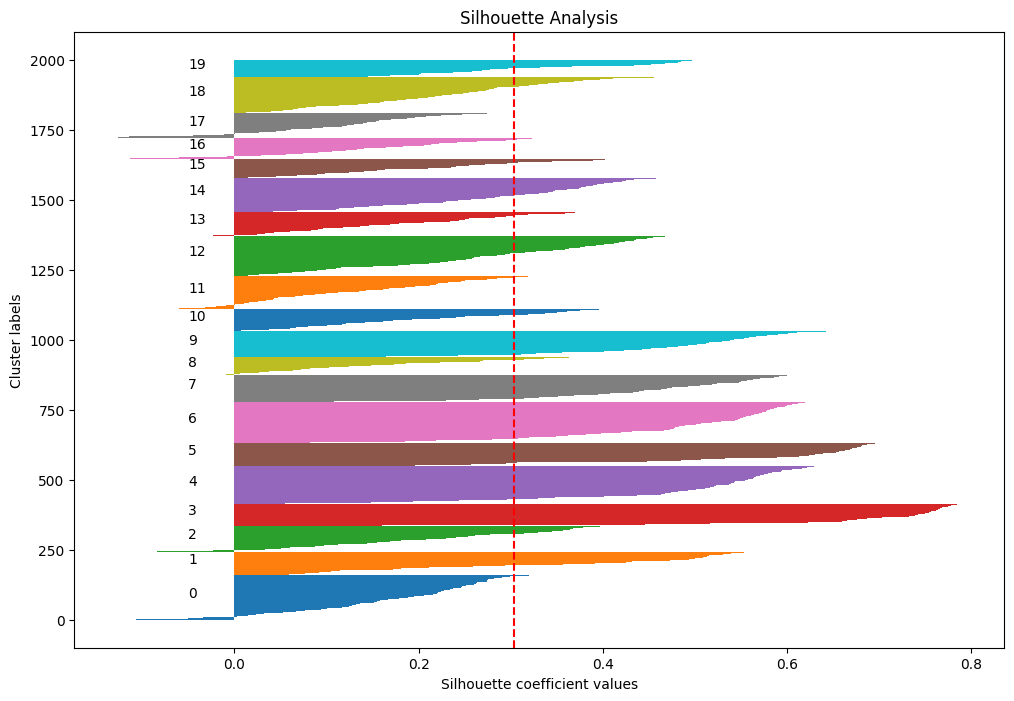

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

silhouette_vals = silhouette_samples(umap_embeddings, clusters)

# Silhouette plot
plt.figure(figsize=(12, 8))
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(clusters)):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower += len(cluster_silhouette_vals)

# The vertical line for average silhouette score of all the values
avg_score = silhouette_score(umap_embeddings, clusters)
plt.axvline(avg_score, color="red", linestyle="--")

plt.title('Silhouette Analysis')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.show()


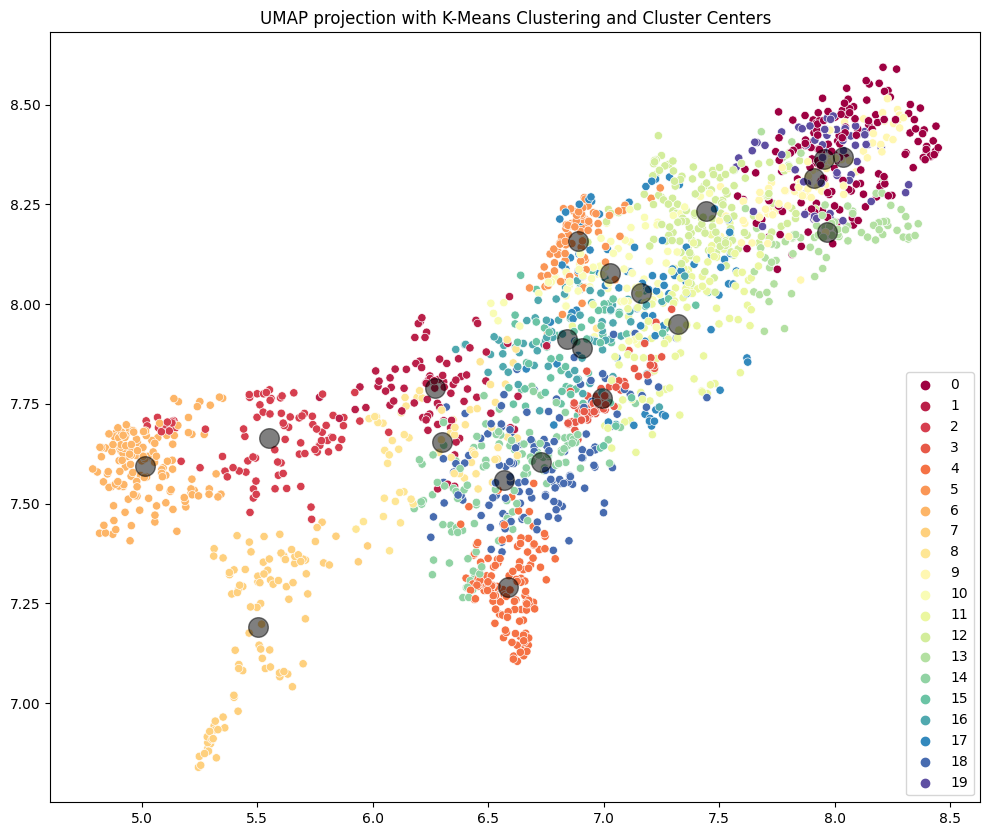

In [ ]:
# Cluster Centers on UMAP 2D projection
plt.figure(figsize=(12, 10))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=clusters, palette='Spectral', legend='full')
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('UMAP projection with K-Means Clustering and Cluster Centers')
plt.show()


<ipython-input-60-af31094d8ac6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(silhouette_vals, bins=20)


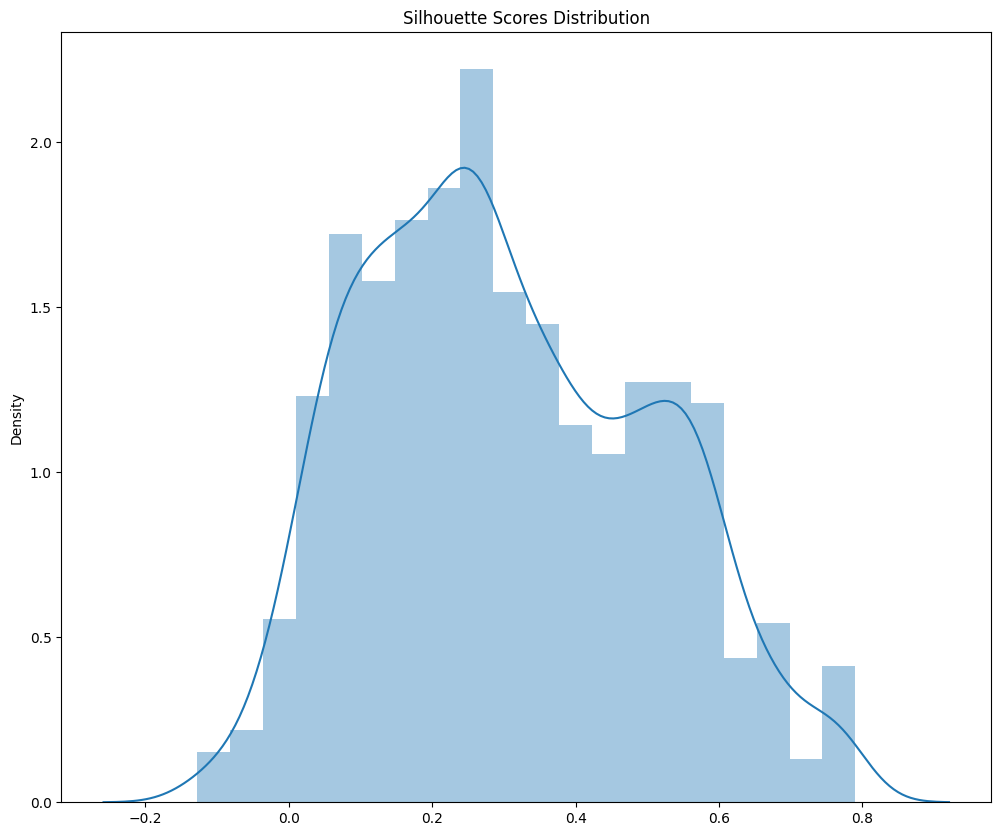

In [ ]:

# Silhouette Plot
plt.figure(figsize=(12, 10))
silhouette_vals = silhouette_samples(umap_embeddings, clusters)
sns.distplot(silhouette_vals, bins=20)
plt.title('Silhouette Scores Distribution')
plt.show()






> **autre méthode de réduction de la dimension ou algorithme de clustering**




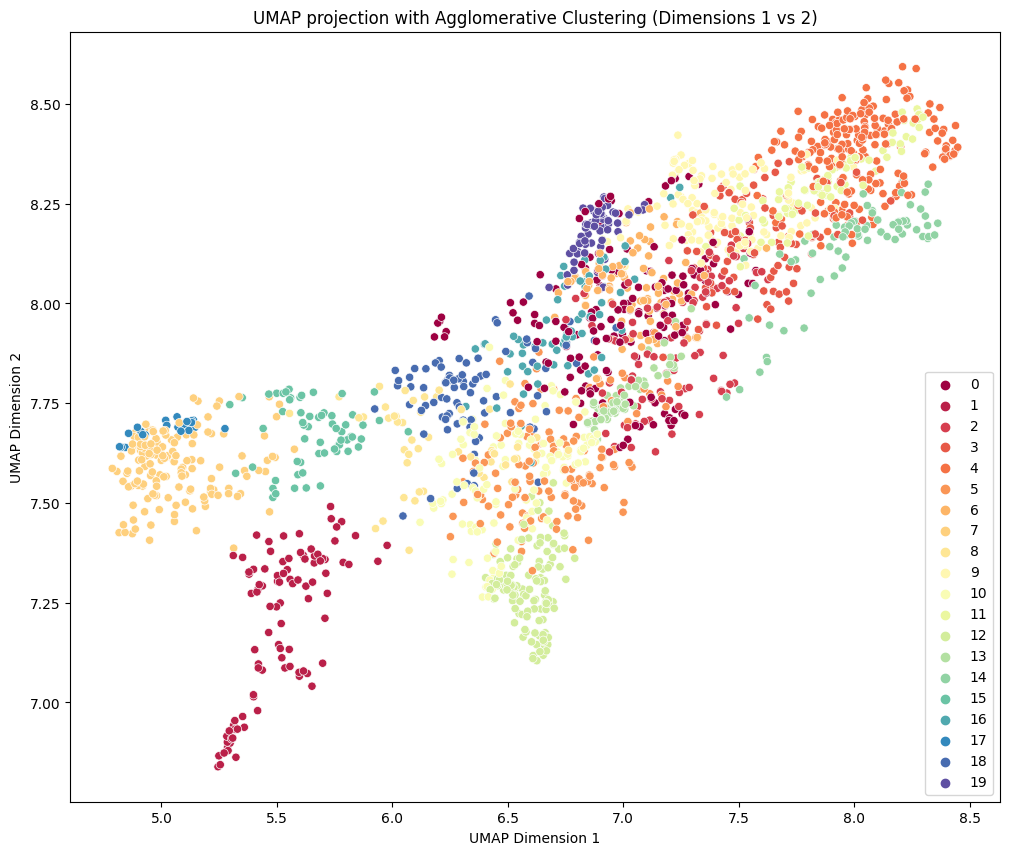

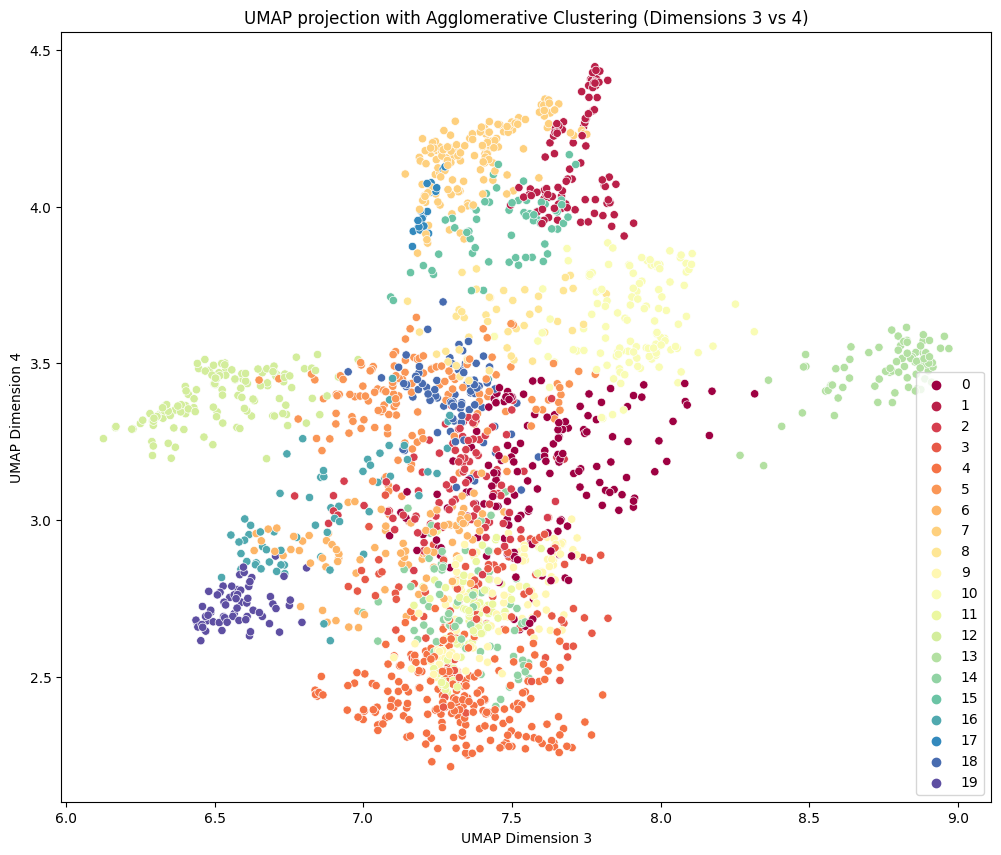

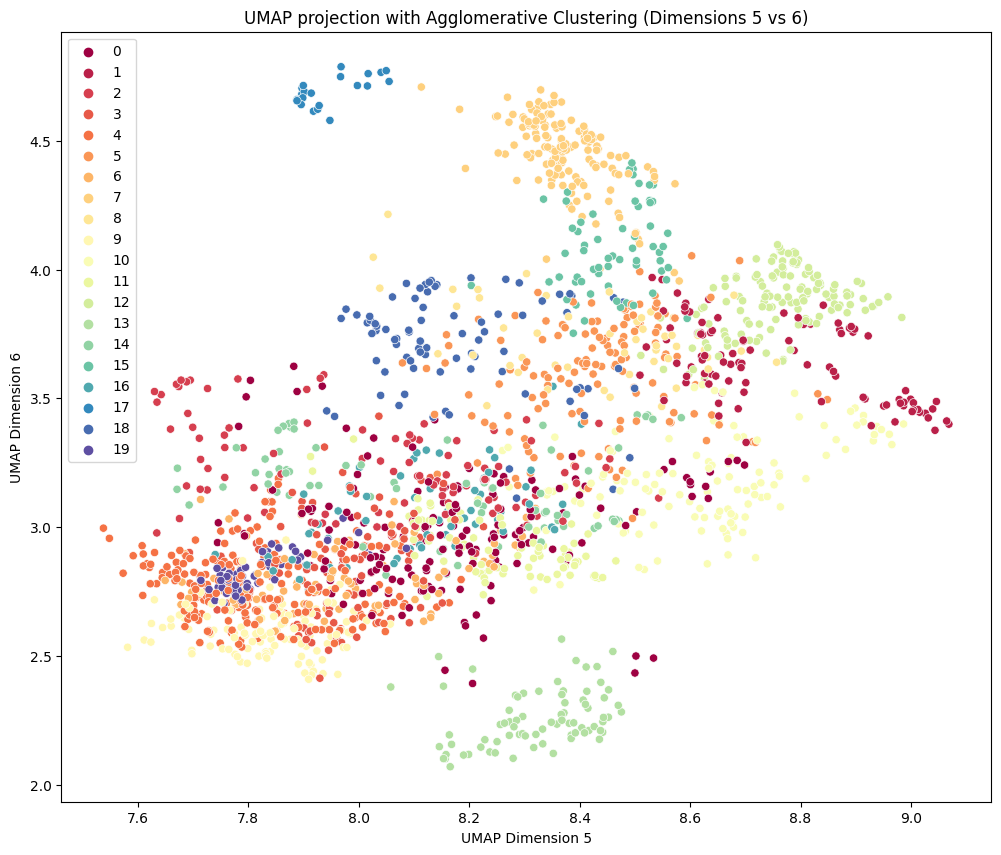

In [67]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=k)  # You can choose a different number of clusters
agglo_clusters = agglo_model.fit_predict(umap_embeddings)

# Now we can plot the UMAP projections with Agglomerative Clustering results
# Define the dimension pairs you want to plot
dimension_pairs = [(0, 1), (2, 3), (4, 5)]

for i, (dim_x, dim_y) in enumerate(dimension_pairs):
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x=umap_embeddings[:, dim_x], y=umap_embeddings[:, dim_y], hue=agglo_clusters, palette='Spectral', legend='full')
    plt.title(f'UMAP projection with Agglomerative Clustering (Dimensions {dim_x+1} vs {dim_y+1})')
    plt.xlabel(f'UMAP Dimension {dim_x+1}')
    plt.ylabel(f'UMAP Dimension {dim_y+1}')
    plt.show()


In [69]:
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score

# Recalculate the silhouette score for the new clustering
silhouette_avg = silhouette_score(umap_embeddings, agglo_clusters)
print(f'Silhouette Score with Agglomerative Clustering: {silhouette_avg:.2f}')

# Assuming you have some true labels to compare against
# Recalculate NMI and ARI for the new clustering
nmi_score = normalized_mutual_info_score(labels, agglo_clusters)
ari_score = adjusted_rand_score(labels, agglo_clusters)
print(f'NMI Score with Agglomerative Clustering: {nmi_score:.2f}')
print(f'ARI Score with Agglomerative Clustering: {ari_score:.2f}')


Silhouette Score with Agglomerative Clustering: 0.28
NMI Score with Agglomerative Clustering: 0.45
ARI Score with Agglomerative Clustering: 0.25
